In [8]:
from sklearn.linear_model import LinearRegression
from statsmodels.stats.diagnostic import het_white
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('mtcars.csv')


data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


mpg - Miles per Gallon
disp - displacement, in cubic inches
hp - horsepower

In [9]:
#define response variable
y = data['mpg']

#define predictor variables
x = data[['disp', 'hp']]

#add constant to predictor variables/This line adds a constant term (intercept) to the predictor variables.
x = sm.add_constant(x)

#fit regression model
model = sm.OLS(y, x).fit()

In [10]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     43.09
Date:                Thu, 12 Dec 2024   Prob (F-statistic):           2.06e-09
Time:                        20:00:53   Log-Likelihood:                -80.309
No. Observations:                  32   AIC:                             166.6
Df Residuals:                      29   BIC:                             171.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.7359      1.332     23.083      0.000      28.013      33.459
disp          -0.0303      0.007     -4.098      0.000      -0.045      -0.015
hp            -0.0248      0.013     -1.856      0.074      -0.052       0.003
==============================================================================
Omnibus:                        3.082   Durbin-Watson:                   1.370
Prob(Omnibus):                  0.214   Jarque-Bera (JB):                2.788
Skew:                           0.680   Prob(JB):                        0.248
Kurtosis:                       2.508   Cond. No.                         733.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

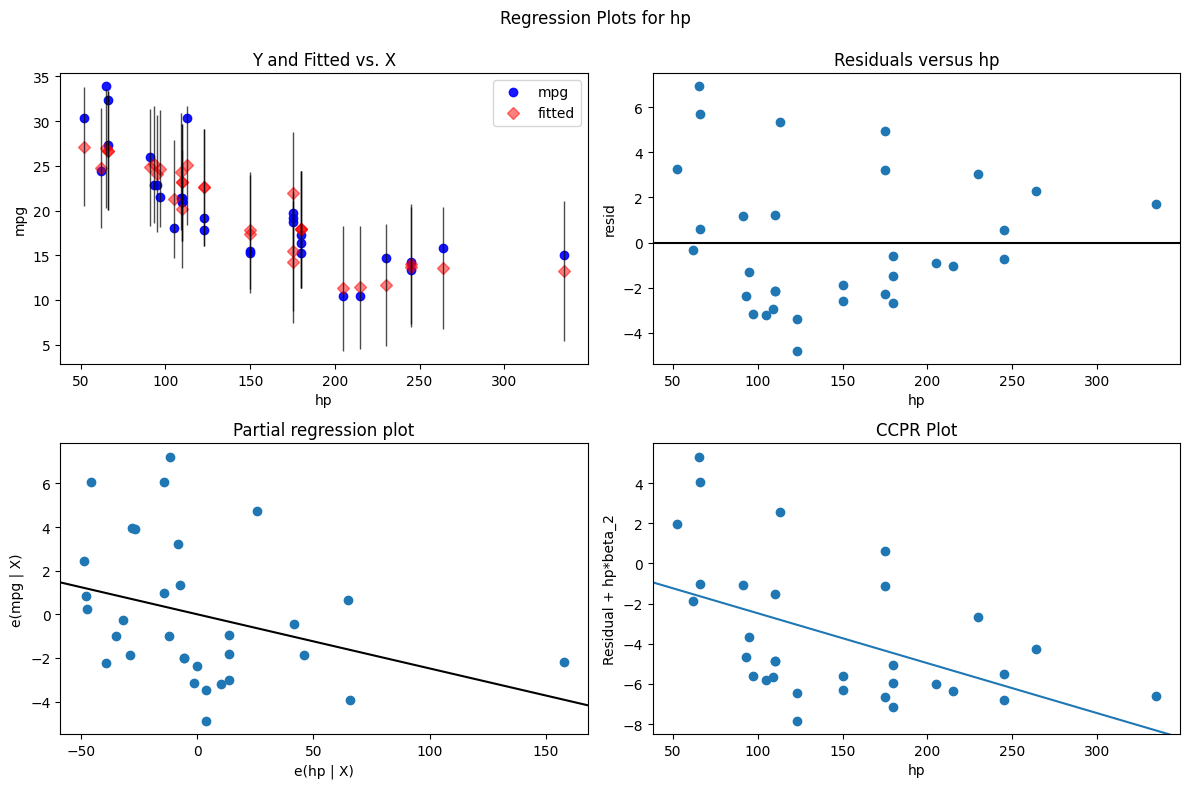

In [11]:

fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'hp', fig=fig)

In [12]:
#perform White's test
white_test = het_white(model.resid,  model.model.exog)
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, white_test)))

{'Test Statistic': 7.076620330416624, 'Test Statistic p-value': 0.21500404394263936, 'F-Statistic': 1.4764621093131864, 'F-Test p-value': 0.2314706594387968}


In [13]:
bp_test = het_breuschpagan(model.resid, model.model.exog)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, bp_test)))

{'LM Statistic': 4.08611739646587, 'LM-Test p-value': 0.12963159992112513, 'F-Statistic': 2.1225532503046978, 'F-Test p-value': 0.1379491108389931}


In [19]:
# WLS model

errors = y - np.mean(y)
error_variance = np.var(errors)
weights = 1 / error_variance


# Fit weighted least squares regression model
x = sm.add_constant(x)
model = sm.WLS(y, x, weights=weights)
results = model.fit()

# Print regression results
print(results.summary())

                            WLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.748
Model:                            WLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     43.09
Date:                Thu, 12 Dec 2024   Prob (F-statistic):           2.06e-09
Time:                        20:01:51   Log-Likelihood:                -80.309
No. Observations:                  32   AIC:                             166.6
Df Residuals:                      29   BIC:                             171.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.7359      1.332     23.083      0.0